In [3]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [43]:
data1 = pd.read_csv("./유성구 업종별 소비금액 (1).csv",encoding='CP949')
data1

,year,month,dong,num,code,name,cost,Name
0,2022,1,가정동,71,G,도매 및 소매업(45-47),139056700,도매
1,2022,1,가정동,83,S,협회 및 단체 수리 및 기타 개인 서비스업(94-96),11294100,협회
2,2022,1,가정동,67,C,제조업(10-34),34390500,제조업
3,2022,1,가정동,73,I,숙박 및 음식점업(55-56),268942300,숙박
4,2022,1,가정동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),1594500,사업시설
...,...,...,...,...,...,...,...,...
2854,2021,12,자운동,83,S,협회 및 단체 수리 및 기타 개인 서비스업(94-96),238605200,협회
2855,2021,12,장대동,83,S,협회 및 단체 수리 및 기타 개인 서비스업(94-96),656391700,협회
2856,2021,12,지족동,83,S,협회 및 단체 수리 및 기타 개인 서비스업(94-96),639053800,협회
2857,2021,12,추목동,83,S,협회 및 단체 수리 및 기타 개인 서비스업(94-96),241198800,협회


In [44]:
data2 = pd.read_csv("./지역화폐 업종별 소비금액 (2).csv",encoding='CP949')

In [45]:
df2 = data2

df2['Name'] =df2['name'].apply(lambda x : x.split(" ")[0])
df2['Name'] = df2['Name'].apply(lambda x : x.split("(")[0])

data2 = df2
data2

,year,month,dong,num,code,name,count,cost,Name
0,2021,10,원내동,67,C,제조업(10-34),300.00,583.36,제조업
1,2021,10,원내동,71,G,도매 및 소매업(45-47),19398.94,22475.86,도매
2,2021,10,원내동,73,I,숙박 및 음식점업(55-56),10338.46,10408.65,숙박
3,2021,10,원내동,77,M,전문 과학 및 기술 서비스업(70-73),150.00,172.21,전문
4,2021,10,원내동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),50.00,208.44,사업시설
...,...,...,...,...,...,...,...,...,...
2735,2022,4,송강동,79,O,공공 행정 국방 및 사회보장 행정(84),233.33,147.46,공공
2736,2022,4,송강동,80,P,교육 서비스업(85),7980.00,4050.71,교육
2737,2022,4,송강동,81,Q,보건업 및 사회복지 서비스업(86-87),18209.52,14532.23,보건업
2738,2022,4,송강동,82,R,예술 스포츠 및 여가관련 서비스업(90-91),6920.00,548.94,예술


# year-month

In [48]:
data1["year"]=data1["year"].astype(str)

data1["month"]=data1["month"].astype(str)

 

for i in range(2,3):

    data1['month'+str(i)] = data1["month"].astype('str').str.zfill(i) # 1~9월까지 0을 채워서 두 자리까지..

data1["year-month"] = data1["year"] + data1["month"] #컬럼 두 개 합치기 = 2xxx0x 형태로 만들기


data1['year-month']=data1['year-month'].apply(lambda _ : datetime.strptime(_,'%Y%m'))
data1

,year,month,dong,num,code,name,cost,Name,month2,year-month
0,2022,1,가정동,71,G,도매 및 소매업(45-47),139056700,도매,01,2022-01-01
1,2022,1,가정동,83,S,협회 및 단체 수리 및 기타 개인 서비스업(94-96),11294100,협회,01,2022-01-01
2,2022,1,가정동,67,C,제조업(10-34),34390500,제조업,01,2022-01-01
3,2022,1,가정동,73,I,숙박 및 음식점업(55-56),268942300,숙박,01,2022-01-01
4,2022,1,가정동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),1594500,사업시설,01,2022-01-01
...,...,...,...,...,...,...,...,...,...,...
2854,2021,12,자운동,83,S,협회 및 단체 수리 및 기타 개인 서비스업(94-96),238605200,협회,12,2021-12-01
2855,2021,12,장대동,83,S,협회 및 단체 수리 및 기타 개인 서비스업(94-96),656391700,협회,12,2021-12-01
2856,2021,12,지족동,83,S,협회 및 단체 수리 및 기타 개인 서비스업(94-96),639053800,협회,12,2021-12-01
2857,2021,12,추목동,83,S,협회 및 단체 수리 및 기타 개인 서비스업(94-96),241198800,협회,12,2021-12-01


In [49]:
data2["year"]=data1["year"].astype(str)

data2["month"]=data1["month"].astype(str)

 

for i in range(2,3):

    data1['month'+str(i)] = data1["month"].astype('str').str.zfill(i) # 1~9월까지 0을 채워서 두 자리까지..

data2["year-month"] = data2["year"] + data2["month"] #컬럼 두 개 합치기 = 2xxx0x 형태로 만들기


data2['year-month']=data2['year-month'].apply(lambda _ : datetime.strptime(_,'%Y%m'))
data2

,year,month,dong,num,code,name,count,cost,Name,year-month
0,2022,1,원내동,67,C,제조업(10-34),300.00,583.36,제조업,2022-01-01
1,2022,1,원내동,71,G,도매 및 소매업(45-47),19398.94,22475.86,도매,2022-01-01
2,2022,1,원내동,73,I,숙박 및 음식점업(55-56),10338.46,10408.65,숙박,2022-01-01
3,2022,1,원내동,77,M,전문 과학 및 기술 서비스업(70-73),150.00,172.21,전문,2022-01-01
4,2022,1,원내동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),50.00,208.44,사업시설,2022-01-01
...,...,...,...,...,...,...,...,...,...,...
2735,2021,12,송강동,79,O,공공 행정 국방 및 사회보장 행정(84),233.33,147.46,공공,2021-12-01
2736,2021,12,송강동,80,P,교육 서비스업(85),7980.00,4050.71,교육,2021-12-01
2737,2021,12,송강동,81,Q,보건업 및 사회복지 서비스업(86-87),18209.52,14532.23,보건업,2021-12-01
2738,2021,12,송강동,82,R,예술 스포츠 및 여가관련 서비스업(90-91),6920.00,548.94,예술,2021-12-01


In [61]:
from sklearn.preprocessing import MinMaxScaler

bf_no_cost = data1["cost"]
scaler = MinMaxScaler()
df_data1 = scaler.fit_transform(data1[bf_no_cost])


KeyError: "None of [Int64Index([ 139056700,   11294100,   34390500,  268942300,    1594500,\n              88592600,    1638200, 2047600400,  306814700,   81144100,\n            ...\n              73350800,     487000,   47840400,  419015300,  107060000,\n             238605200,  656391700,  639053800,  241198800,   31237500],\n           dtype='int64', length=2859)] are in the [columns]"

In [ ]:
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(data2)



In [35]:
import scipy.stats as ss

data1_cost_no = ss.zscore(data1["cost"])
data1_cost_no

0      -0.219361
1      -0.264387
2      -0.256247
3      -0.173586
4      -0.267805
          ...   
2854   -0.184278
2855   -0.037041
2856   -0.043151
2857   -0.183364
2858   -0.257358
Name: cost, Length: 2859, dtype: float64

In [36]:
data2_cost_no = ss.zscore(data2["cost"])
data2_cost_no

0      -0.228589
1       1.951603
2       0.749875
3      -0.269534
4      -0.265926
          ...   
2735   -0.271998
2736    0.116712
2737    1.160527
2738   -0.232016
2739    0.019521
Name: cost, Length: 2740, dtype: float64

In [37]:
data1.head()

,year,month,dong,num,code,name,cost,Name,month2
0,2022,1,가정동,71,G,도매 및 소매업(45-47),139056700,도매,01
1,2022,1,가정동,83,S,협회 및 단체 수리 및 기타 개인 서비스업(94-96),11294100,협회,01
2,2022,1,가정동,67,C,제조업(10-34),34390500,제조업,01
3,2022,1,가정동,73,I,숙박 및 음식점업(55-56),268942300,숙박,01
4,2022,1,가정동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),1594500,사업시설,01


# 업종 코드 분석

In [38]:
data1['code'].unique() # F. D. K 남는다.

array(['G', 'S', 'C', 'I', 'N', 'P', 'Q', 'L', 'R', 'F', 'J', 'O', 'H',
       'M', 'D', 'K'], dtype=object)

In [39]:
data2['code'].unique()

array(['C', 'G', 'I', 'M', 'N', 'P', 'Q', 'R', 'S', 'J', 'H', 'O', 'L'],
      dtype=object)

# 유성구 업종별

KeyError: 'year-month'

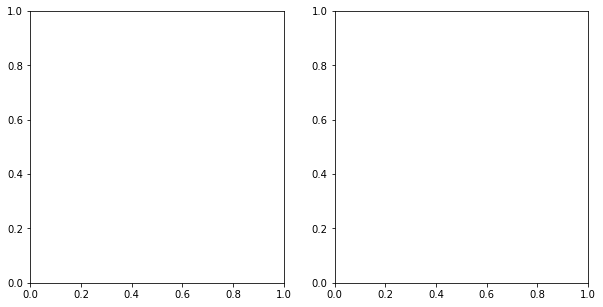

In [40]:

list = ['G', 'S', 'C', 'I', 'N', 'P', 'Q', 'L', 'R', 'F', 'J', 'O', 'H',
       'M', 'D', 'K']

data11 = data1[data1['code']=='N']
data11

f,ax = plt.subplots(1,2,figsize=(10,5))
data11.groupby('year-month')['cost'].sum().plot.line(ax=ax[0],color='Red')
data11.groupby('dong')['cost'].sum().plot.hist(ax=ax[1],color='Red')


ax[0].set_title('month vs cost')
ax[0].set_xlabel('month')


ax[1].set_title('dong vs cost')
ax[1].set_xlabel('dong')


# 지역화폐 업종별

Text(0.5, 0, 'dong')

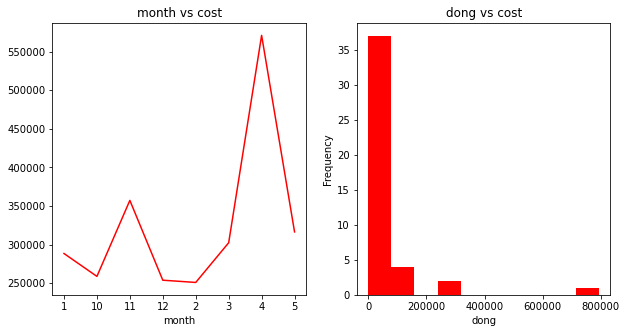

In [190]:

list = ['G', 'S', 'C', 'I', 'N', 'P', 'Q', 'L', 'R', 'F', 'J', 'O', 'H',
       'M', 'D', 'K']

data22 = data2[data2['code']=='G']
data22

f,ax = plt.subplots(1,2,figsize=(10,5))
data22.groupby('month')['cost'].sum().plot.line(ax=ax[0],color='Red')
data22.groupby('dong')['cost'].sum().plot.hist(ax=ax[1],color='Red')


ax[0].set_title('month vs cost')
ax[0].set_xlabel('month')


ax[1].set_title('dong vs cost')
ax[1].set_xlabel('dong')

# 유성구 VS 지역화폐 업종별

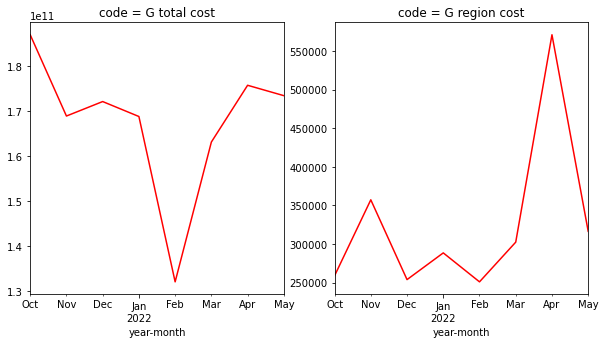

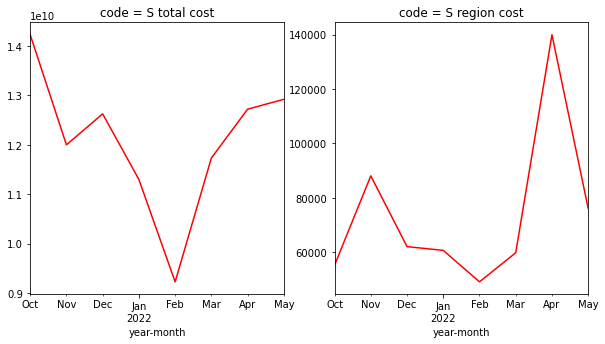

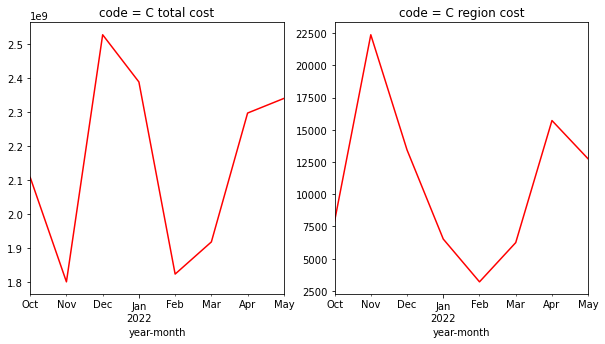

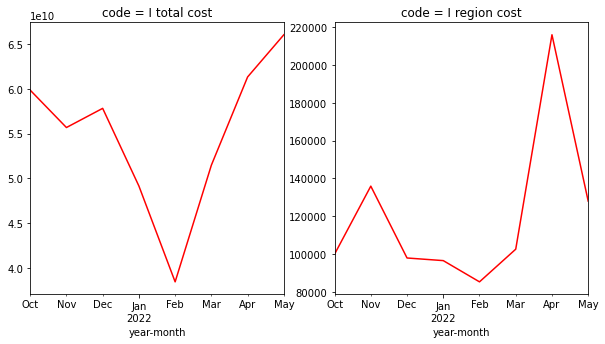

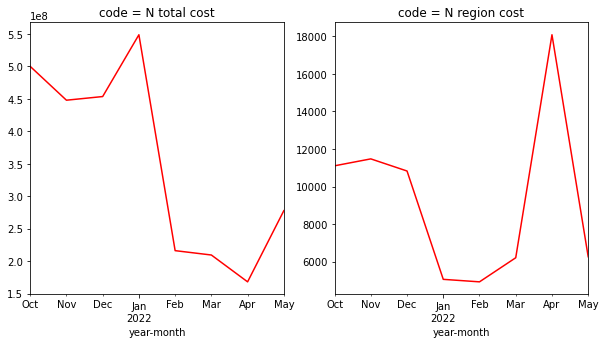

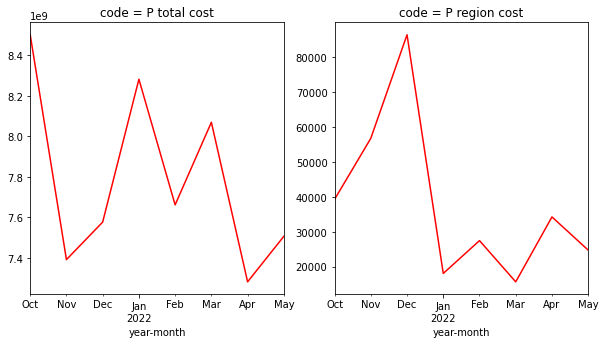

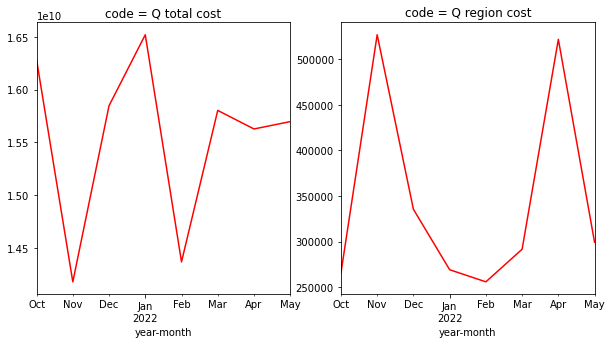

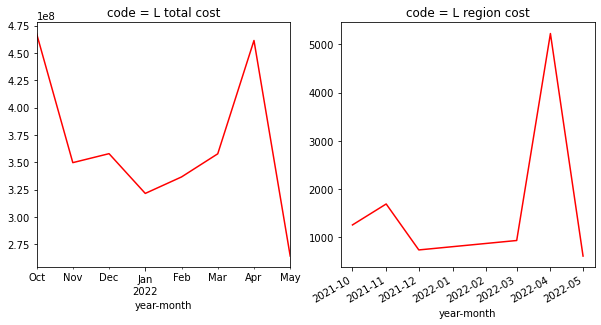

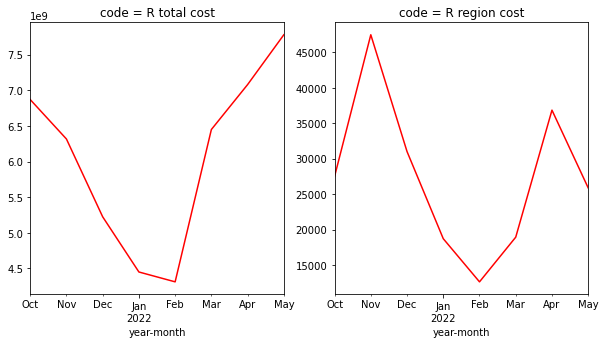

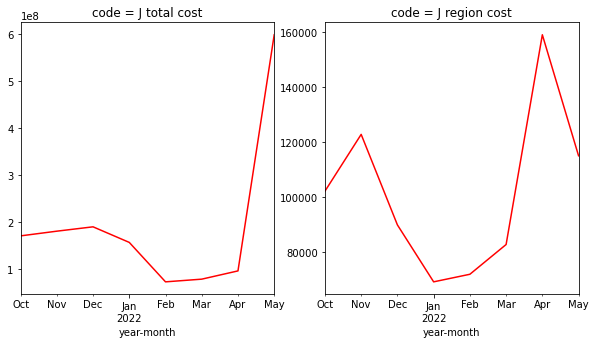

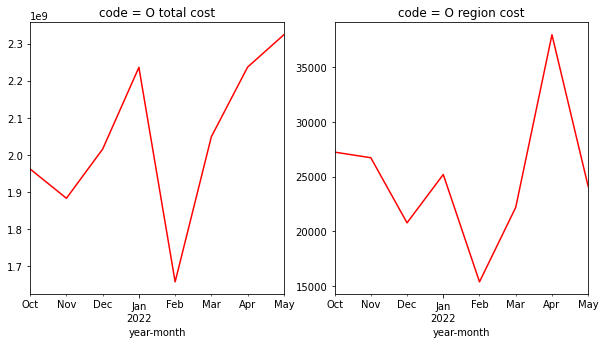

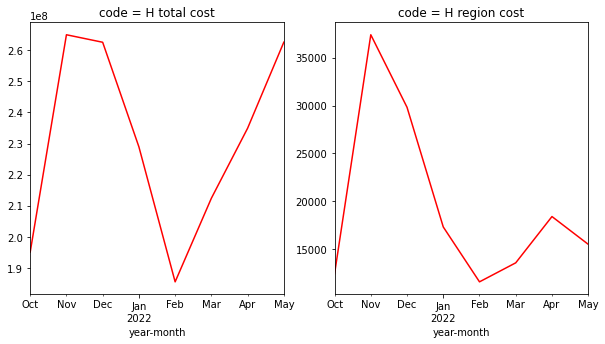

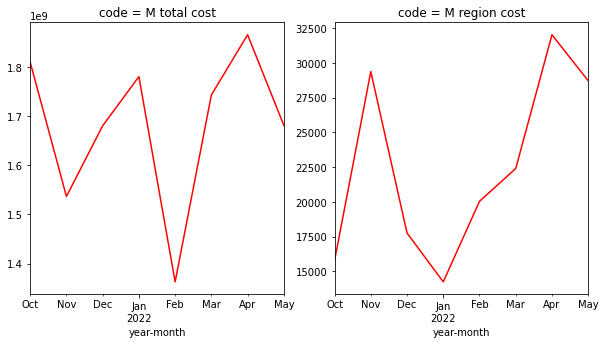

In [192]:
list = list = ['G', 'S', 'C', 'I', 'N', 'P', 'Q', 'L', 'R', 'J', 'O', 'H','M']
for i in list:
    data11 = data1[data1['code']==i]
    data22 = data2[data2['code']==i]

    f,ax = plt.subplots(1,2,figsize=(10,5))
    data11.groupby('year-month')['cost'].sum().plot.line(ax=ax[0],color='Red')
    data22.groupby('year-month')['cost'].sum().plot.line(ax=ax[1],color='Red')
    #data11.groupby('dong')['cost'].sum().plot.hist(ax=ax[2],color='Red')
    #data22.groupby('dong')['cost'].sum().plot.hist(ax=ax[3],color='Red')

    ax[0].set_title(f'code = {i} total cost')
    ax[0].set_xlabel('year-month')


    ax[1].set_title(f'code = {i} region cost')
    ax[1].set_xlabel('year-month')

# 머신러닝 회귀 (훈련 - 유성구 소비, 테스트 - 지역화폐 소비)

In [142]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [201]:
data1 = data1[data1['code']=='N']

In [202]:
data1

,year,month,dong,num,code,name,cost,Name,month2,year-month
83,2021,10,관평동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),9517600,사업시설,10,2021-10-01
84,2021,10,교촌동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),4595800,사업시설,10,2021-10-01
85,2021,10,구암동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),37847100,사업시설,10,2021-10-01
86,2021,10,대정동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),14276400,사업시설,10,2021-10-01
87,2021,10,도룡동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),101890500,사업시설,10,2021-10-01
...,...,...,...,...,...,...,...,...,...,...
2727,2022,5,용계동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),2599100,사업시설,05,2022-05-01
2734,2022,5,용산동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),1890500,사업시설,05,2022-05-01
2750,2022,5,원신흥동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),1531900,사업시설,05,2022-05-01
2808,2022,5,지족동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),24241100,사업시설,05,2022-05-01


In [205]:
# 데이터 지정
X = data1.iloc[:,1].values
y = data1.iloc[:,6].values

In [206]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # fit 학습시킨다. (모델 생성)

ValueError: Expected 2D array, got 1D array instead:
array=[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 12. 12. 12. 12. 12. 12. 12. 12. 12. 10. 10. 10. 10. 10. 11. 11.
 11. 11. 11. 12. 12. 12. 12. 12.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.